# Proyecto II Bimestre
## Juan José Morales
## Página web: https://www.gamesfull.org/category/accion/
## Introducción: 
### El objetivo de este proyecto consiste en realizar gráficos relacionando la información extraida a través de scrapy con la finalidad de analizarlos y entender lo que estos muestran. Se emplearán los conocimientos adquiridos a lo largo de la materia de Introducción al Desarrollo Web.
### Esta  página web posee información referenten a videojuegos  que han sido publicados a lo largo de los años.
## Columnas:
### Titulo: Nombre del videojuego
### Votos: Cantidad de usuarios que votaron para colocar un rating al juego.
### Rating: Promedio sobre 5 de acuerdo a los votos dados.
### Fechas:  Fecha en la que se lanzó el videojuego al mercado.
### Uploader: Usuario administrador de la página web que subió el juego.
### Tamanio: Cantidad en MB o GB del juego
### Visitas: Cantidad de veces que el enlace al videojuego ha sido accedido
## Gráficos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime

In [2]:
path = 'C://Users//MORALES//Documents//GitHub//py-morales-banda-juan-jose//Deberes//Proyecto2//Gamesfull//Juegos.xlsx'
df_gamesfull = pd.read_excel(path)
max = len(df_gamesfull['Titulo'])
df_gamesfull['Tamanio'].fillna('0 GB', inplace= True)
df_gamesfull['Votos'].fillna(method ='ffill', inplace= True)
df_gamesfull['Rating'].fillna(method ='ffill', inplace= True)
df_gamesfull['Visitas'].fillna(method ='ffill', inplace= True)

## Se desea conocer cual es el uploader que más juegos a subido en el sitio web. 

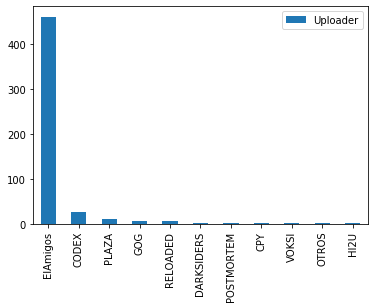

In [20]:
df_gamesfull['Uploader'].value_counts().plot(kind='bar',legend='Reverse')

## Se desea conocer cual es el juego que más votos ha recibido.

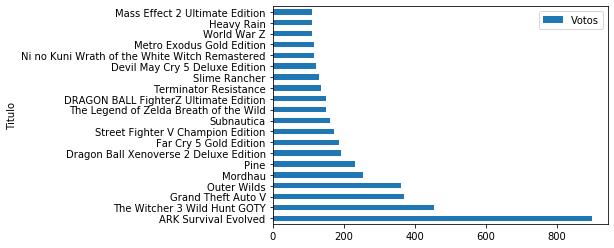

In [19]:
df_columnas = ['Titulo', 'Votos']
valores = df_gamesfull[df_columnas].sort_values(by='Votos', ascending = False).head(20)
valores.index = valores['Titulo']
valores.plot( kind='barh')

## Se desea conocer cual fue el juego mejor rankeado por la comunidad

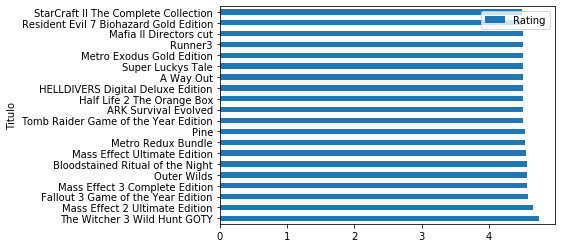

In [18]:
df_columnas = ['Titulo', 'Rating']
valores = df_gamesfull[df_columnas].sort_values(by='Rating', ascending = False).head(20)
valores.index = valores['Titulo']
valores.plot( kind='barh')

## Se desea conocer cual fue el juego peor rankeado por la comunidad

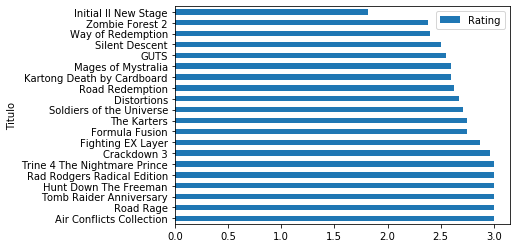

In [17]:
df_columnas = ['Titulo', 'Rating']
valores = df_gamesfull[df_columnas].sort_values(by='Rating', ascending = False).tail(20)
valores.index = valores['Titulo']
valores.plot( kind='barh')

## Se desea conocer que año se publicaron más juegos.

Text(0, 0.5, 'Años')

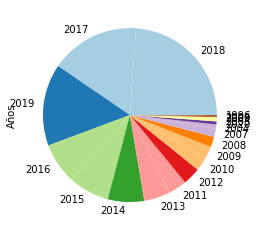

In [7]:
listaAnios = []
for i in range (0, max):
  if (type(df_gamesfull['Fechas'][i]) == str):
    fechaCompleta = datetime.strptime(df_gamesfull['Fechas'][i], '%d/%m/%y')
    listaAnios.append(fechaCompleta.year)
  else:
    pass

df_anios = pd.DataFrame()
df_anios = df_anios.append(listaAnios)
df_anios[0].value_counts().plot(kind='pie',cmap ='Paired')
plt.ylabel('Años')

## Se desea conocer que mes se han publicado más videojuegos

Text(0, 0.5, 'Meses')

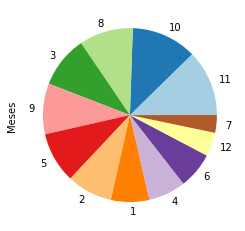

In [8]:
listaMeses = []
for i in range (0, max):
  if (type(df_gamesfull['Fechas'][i]) == str):
    fechaCompleta = datetime.strptime(df_gamesfull['Fechas'][i], '%d/%m/%y')
    listaMeses.append(fechaCompleta.month)
  else:
    pass

df_meses = pd.DataFrame()
df_meses = df_meses.append(listaMeses)
df_meses[0].value_counts().plot(kind='pie',cmap ='Paired')
plt.ylabel('Meses')

## Se desea conocer el juego que más visitas ha tenido en la página web

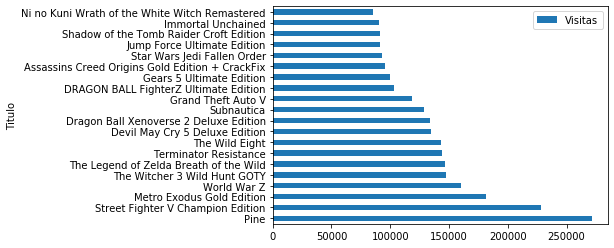

In [16]:
df_columnas = ['Titulo', 'Visitas']
valores = df_gamesfull[df_columnas].sort_values(by='Visitas', ascending = False).head(20)
valores.index = valores['Titulo']
valores.plot( kind='barh')

## Se quieren conocer los videojuegos que más pesan, está medido en MB

In [10]:
for i in range(0,max):
  if(type(df_gamesfull['Tamanio'][i]) == str): 
    df_gamesfull['Tamanio'][i] = df_gamesfull['Tamanio'][i].replace(',','.')

# El mensaje que aparece es solo una notificación referente a la documentación

C:\Users\MORALES\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for i in range(0,max):
  if(type(df_gamesfull['Tamanio'][i]) == str): 
    df_gamesfull['Tamanio'][i] = df_gamesfull['Tamanio'][i].replace(' MB','')
    
# El mensaje que aparece es solo una notificación referente a la documentación

C:\Users\MORALES\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
for i in range(0,max):
  if(type(df_gamesfull['Tamanio'][i]) == str):
    df_gamesfull['Tamanio'][i] = df_gamesfull['Tamanio'][i].replace(' GB','')
    df_gamesfull['Tamanio'][i] = df_gamesfull['Tamanio'][i].replace(' gb','')
    df_gamesfull['Tamanio'][i] = float(df_gamesfull['Tamanio'][i])
    df_gamesfull['Tamanio'][i] = df_gamesfull['Tamanio'][i] * 1000

# El mensaje que aparece es solo una notificación referente a la documentación

C:\Users\MORALES\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MORALES\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\MORALES\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\MORALES\Ana

In [13]:
for i in range(0,max):
  if(type(df_gamesfull['Tamanio'][i]) == str): 
    df_gamesfull['Tamanio'][i] = float(df_gamesfull['Tamanio'][i])    

# El mensaje que aparece es solo una notificación referente a la documentación

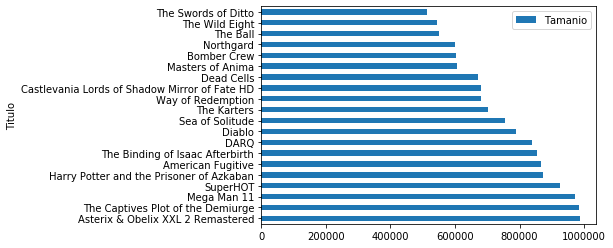

In [15]:
df_columnas = ['Titulo', 'Tamanio']
valores = df_gamesfull[df_columnas].sort_values(by='Tamanio', ascending = False).head(20)
valores.index = valores['Titulo']
valores.plot( kind='barh')

In [ ]:
#pivote = pd.pivot_table(df_gamesfull, index=['Uploader'], values=['Visitas'], columns=['Fechas'], aggfunc='count')
#pivote.groupby('Uploader').plot(kind = 'bar', legend = 'Reverse')